## Ridge and Lasso Regression: Upgrading Regression Methods
#### *by Kyoosik Kim*
------

### Introduction
The [first version of regression](https://en.wikipedia.org/wiki/Francis_Galton) was invented more than a hundred years ago. While the core concept of the early version remains almost the same, the old method was susceptible to overfitting and [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) as more predictors are added onto an equation. Therefore, some other methods were invented to put a check on a variance from growing too much and to find the optimal point which is often times called "sweet spot" where total error is the minimum. The [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization) and [Lasso Regression](https://en.wikipedia.org/wiki/Lasso_(statistics)) are well known methods to the job called [Regularization](https://en.wikipedia.org/wiki/Regularization_(mathematics)) or [Regression Shrinkage Method](https://en.wikipedia.org/wiki/Shrinkage_(statistics)).

<table>
    <tr>
        <td><img src="http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png" style="width: 500px;"></td>
        <td><img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05153246/bias-variance.png" style="width: 328px;"></td>
    </tr>
</table>

------


### Brief Review of Linear Regression
The mathematical expression of linear regression is as follows. 

$$Y=\beta_0+\beta_1X_1+\beta_2X_1+\dots+\beta_pX_{p-1}+\epsilon$$

This can then be expressed in matrix version.

$$Y=XB+e\ \ where\ B\ is\ \beta_0,\ \beta_1,\ ...\ \beta_p$$
  
What we want to know is coefficients, the betas, and these can be estimated with Ordinary Least Squares [(OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares). Since we just expressed the equation in matrix, we can use the matrix property to find the betas.

$$\hat{B}=(X^TX)^{-1}X^TY\ \ where\ \hat{B}\ is\ the\ estimate$$

------

### Math for Ridge Regression
OLS method basically finds the $\beta$'s to minimize Residual Sum of Squares [(RSS)](https://en.wikipedia.org/wiki/Residual_sum_of_squares).

$$RSS=\sum_{i=1}^{n}(y_i-\hat{y})^2=\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_j)^2$$

What Ridge Regression does is penalize RSS by adding another term and for searching the minimization.

$$RSS\ with\ Penalty=\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_j)^2+\lambda\sum_{j=1}^{p}\beta_j^2\ where\ \lambda\ is\ a\ constant$$

Then, our goal becomes to minimize the term. If you are not familiar with the rightmost term, refer to this article about [Euclidean Norm](https://en.wikipedia.org/wiki/Norm_(mathematics))

$$\min\limits_{\beta\in R^p}\{{\frac{1}{N}\parallel Y-X\beta\parallel_2^2+\lambda\parallel\beta\parallel_2^2}\}\ where\ N\ is\ number\ of\ cases$$

We can find the $\beta$'s by utilizing properties of matrix.

$$\hat{\beta}_{ridge}=(X^TX+\lambda I_p)^{-1}X^TY$$

We can iterate different $\lambda$ values to find the best fit for a model.

------

### Math for Lasso Regression
As with Ridge Regression, OLS method is modified for Lasso Regression. In fact, only difference is the penalty term.

$$RSS\ with\ Penalty=\sum_{i=1}^{n}(y_i-\sum_{j=1}^{p}x_{ij}\beta_j)^2+\lambda\sum_{j=1}^{p}|\beta_j|$$

The penalty is now sum of absolute $\beta$'s, instead of sum of squares. The term for these penalties are *L1* (lasso) and *L2* (ridge). As with Ridge Regression, we want to minimize the following term.

$$\min\limits_{\beta\in R^p}\{{\frac{1}{N}\parallel Y-X\beta\parallel_2^2+\lambda\parallel\beta\parallel_1}\}\ where\ N\ is\ number\ of\ cases$$

The below is the matrix equation to find the $\beta$'s.

$$\hat{\beta}_{lasso}=\hat{\beta}_j^{OLS}\ max\ (0, 1-\frac{n\lambda}{|\hat{\beta}_j^{OLS}|})\ \ where\ \ \hat{\beta}_j^{OLS}=(X^TX)^{-1}X^TY$$

Notice there is a function *max* in the equation that can result in zero. This is a distinctive difference from Ridge Regression which no $\beta$ can be zero. Due to this property, Lasso Regression can select variables by increasing lambda to see which variables are still not zero.

------

### Geometric Interpretation
Any coefficients can never be zero in Ridge Regression, but can be in Lasso Regression. This would be understood in an easier way with a geometric figure. Let's say there is a model with two variables and we want to know their coefficients; $\beta_1$ and $\beta_2$. They can be mapped as follows.
![Lasso vs. Ridge](https://jamesmccammondotcom.files.wordpress.com/2014/04/screen-shot-2014-04-19-at-11-19-00-pm.png?w=700)
The contours in red represent sets of RSS and the center is the coefficients found by OLS. The square and the circle are L1 penalty and L2 penalty, respectively. Recall that the constraints for each regression to understand the shapes of penalty.

$$Lasso\ constraint:\ |\beta_1|+|\beta_2|=1\\ Ridge\ constraint:\ \beta_1^2+\beta_2^2=1$$

The points the shapes meet the edge contours are where shrinkage methods estimate the coefficients. As seen on the maps, the estimates by shrinkage methods are found less than those of OLS because the shapes play a role of penalizing. Depending on sizes of the shapes and contours, these points would locate differently. This is a trade-off between the penalty term and RSS.

Again, the left represents Lasso Regression and the right represents Ridge Regression. Moving the penalty terms up and down, the contours would be pushed up and down, changing the estimates where they contact. The difference between the two regression are here that the estimates can be zero for some variable in Lasso, but can't be in Ridge Regression. The Lasso on the map shows this property, having $\beta=0$.

------

### Usage of Ridge/Lasso Regression
Recall that the two of them were devised to upgrade the traditional linear regression. Therefore, they are capable of what linear regression is capable of. Just as linear regression can be used for regression and also clasification, they can do the same job mostly more effectively. However, Ridge Regression is not capable of *variable selection* as explained with the equation. On the contrary, Lasso Regression can select variables by manipulating the lambda which can make some $\beta$(s) equal to zero.

* They can be used both for regression and classification problems
* Ridge Regression is good at handling overfitting
* Lasso Regression can be used for feature selection

<br>
<table>
    <tr>
        <td><img src="https://ipython-books.github.io/pages/chapter08_ml/01_scikit_files/01_scikit_24_1.png" style="width: 400px;"/></td>
        <td><img src="https://ipython-books.github.io/pages/chapter08_ml/01_scikit_files/01_scikit_28_1.png", style="width: 400px";/></td>
    </tr>
</table>

------

### Demonstration with Sample Data
We will implement Ridge Regression and Lasso Regression to the widely known data set *Boston House Price* to look into the properties of the regression methods. We should standardize the scale for the assumption of Ridge Regression and Lasso Regression.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [ ]:
# standardize and train/test split
house_price.data = preprocessing.scale(house_price.data)
X_train, X_test, y_train, y_test = train_test_split(
    house_price.data, house_price.target, test_size=0.3, random_state=10)

------

#### - Linear Regression with OLS Method

In [ ]:
ols_reg = LinearRegression()
ols_reg.fit(X_train, y_train)
ols_pred = ols_reg.predict(X_test)

pd.DataFrame({'variable': house_price.feature_names, 'estimate': ols_reg.coef_})

,variable,estimate
0,CRIM,-1.321404
1,ZN,1.514832
2,INDUS,-0.166266
3,CHAS,0.411579
4,NOX,-1.771168
5,RM,2.352821
6,AGE,0.318499
7,DIS,-3.256645
8,RAD,2.632576
9,TAX,-2.059466


For the sake of observing the shrinkage, we would want to choose a few variables to plot them with different lambda values. The below will be chosen.

* RM / ZN / AGE / CRIM / TAX

------

#### - Ridge Regression

In [ ]:
house_price.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

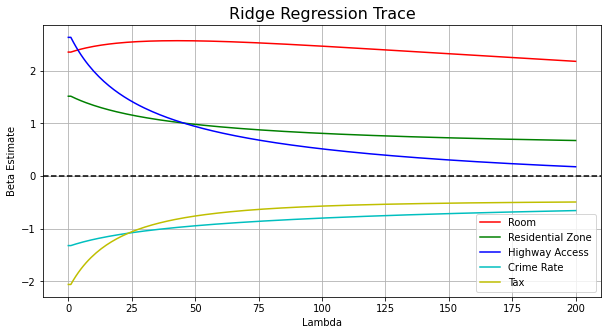

In [ ]:
# initialize
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

alphas = np.arange(0, 200, 1)

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    # prediction
    ridge_train_pred.append(ridge_reg.predict(X_train))
    ridge_test_pred.append(ridge_reg.predict(X_test))
    
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, axis=1).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.TAX, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

As a $\lambda$ increases, the lines representing the features are converging to zero. These lines are $\beta$'s and they are same as OLS model's coefficients at lambda zero because of no penalty. While the feature "Room" stays quite the same, "Tax" gets close to zero quickly. This is suggestive of each feature's importance. Note that the lines will never hit zero, but only converges to it.

------

#### - Lasso Regression

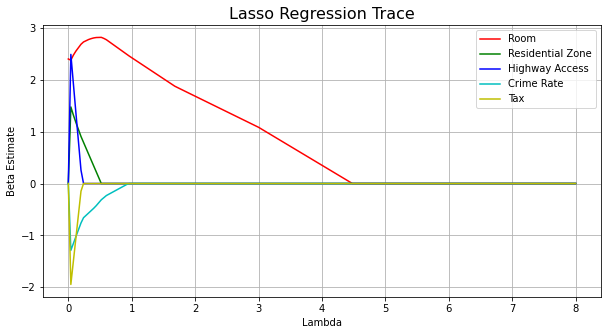

In [ ]:
# initialize
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)
lasso_df = pd.DataFrame({'variable': house_price.feature_names, 'estimate': lasso_reg.coef_})
lasso_train_pred = []
lasso_test_pred = []

alphas = np.arange(0.01, 8.01, 0.04)

for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lasso_df[var_name] = lasso_reg.coef_
    # prediction
    lasso_train_pred.append(lasso_reg.predict(X_train))
    lasso_test_pred.append(lasso_reg.predict(X_test))

lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, axis=1).reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.RM, 'r', lasso_df.ZN, 'g', lasso_df.RAD, 'b', lasso_df.CRIM, 'c', lasso_df.TAX, 'y')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 10, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

Unlike Ridge Regression, the $\beta$'s hit zero, which means some features get cast out after a certain point. Recalling the equation, This is why Lasso Regression has an advantage in feature selection. As with Ridge Regression, "Room" survives longer than others and "Tax" becomes null almost upon the iteration.

------

#### - Analysis
We started with the main idea of *Bias vs. Variance*. The core of this is to see how a model gets overfitted or underfitted as the model becomes more or less complex. We can experiment these by observing [R-squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) and [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error). Controlling a model complexity should be done by adding or removing variables, but we can do the job simply by changing lambdas for Ridge and Lasso Regression, which is already done above. This is fair because the lambda makes the models more complex or less, and this is what these models are designed for.

Text(0.5, 0, 'Model Simplicity$\\longrightarrow$')

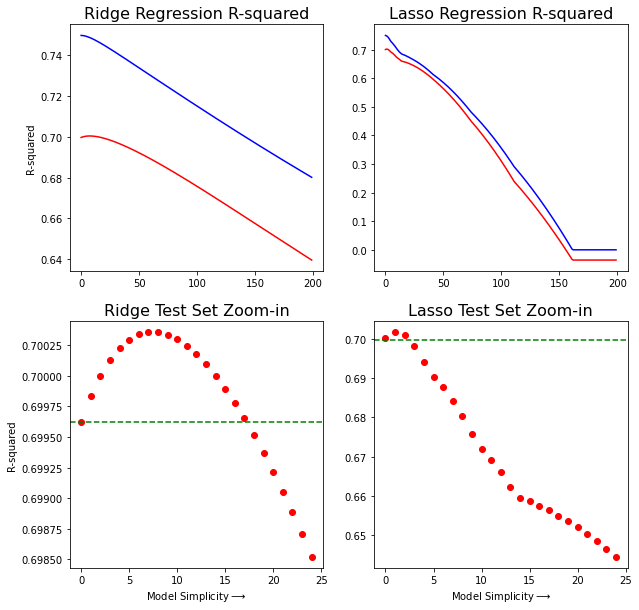

In [ ]:
# R-squared of training set
ridge_r_squared_train = [r2_score(y_train, p) for p in ridge_train_pred]
lasso_r_squared_train = [r2_score(y_train, p) for p in lasso_train_pred]

# R-squared of test set
ridge_r_squared_test = [r2_score(y_test, p) for p in ridge_test_pred]
lasso_r_squared_test = [r2_score(y_test, p) for p in lasso_test_pred]

# ols for benchmark
ols_r_squared = r2_score(y_test, ols_pred)

# plot R-squared of training and test
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0,0].plot(ridge_r_squared_train, 'b', ridge_r_squared_test, 'r')
axes[0,0].set_title("Ridge Regression R-squared", fontsize=16)
axes[0,0].set_ylabel("R-squared")

axes[0,1].plot(lasso_r_squared_train, 'b', lasso_r_squared_test, 'r')
axes[0,1].set_title("Lasso Regression R-squared", fontsize=16)

# test set curve
axes[1,0].plot(ridge_r_squared_test[:25], 'ro')
axes[1,0].axhline(y=ols_r_squared, color='g', linestyle='--')
axes[1,0].set_title("Ridge Test Set Zoom-in", fontsize=16)
axes[1,0].set_xlabel("Model Simplicity$\longrightarrow$")
axes[1,0].set_ylabel("R-squared")

axes[1,1].plot(lasso_r_squared_test[:25], 'ro')
axes[1,1].axhline(y=ols_r_squared, color='g', linestyle='--')
axes[1,1].set_title("Lasso Test Set Zoom-in", fontsize=16)
axes[1,1].set_xlabel("Model Simplicity$\longrightarrow$")

We see the R-squared of test set is located below the R-squared of training set for both the regression. This is natural because the training set R-squared is calculated based on itself while the test set R-squared is based on the model made from training set.

Another point is that the training set R-squared constantly declines as the model gets simpler. Understanding it reversely, we know that training set R-squared should increase as we add more variables, which is called *overfitting*. From the bottome plots, however, it seems like the test set R-squared improves as the model becomes simpler. Recalling the definition of overfitting, a simpler model is good for new observations, the test set here.

------

Text(0.5, 0, 'Model Simplicity$\\longrightarrow$')

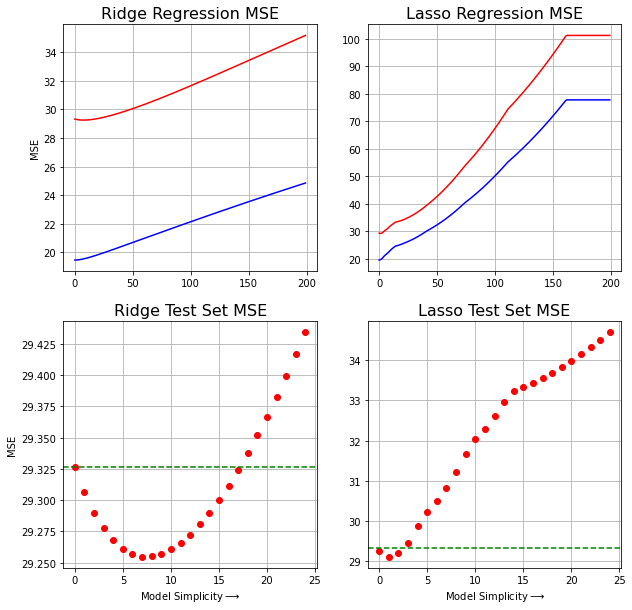

In [ ]:
# MSE of training set
ridge_mse_train = [mean_squared_error(y_train, p) for p in ridge_train_pred]
lasso_mse_train = [mean_squared_error(y_train, p) for p in lasso_train_pred]

# MSE of test set
ridge_mse_test = [mean_squared_error(y_test, p) for p in ridge_test_pred]
lasso_mse_test = [mean_squared_error(y_test, p) for p in lasso_test_pred]

# ols mse for benchmark
ols_mse = mean_squared_error(y_test, ols_pred)

# plot MSE of training and test
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
plt.rcParams['axes.grid'] = True

# training set and test set together
axes[0,0].plot(ridge_mse_train, 'b', ridge_mse_test, 'r')
axes[0,0].set_title("Ridge Regression MSE", fontsize=16)
axes[0,0].set_ylabel("MSE")

axes[0,1].plot(lasso_mse_train, 'b', lasso_mse_test, 'r')
axes[0,1].set_title("Lasso Regression MSE", fontsize=16)

# test set curve
axes[1,0].plot(ridge_mse_test[:25], 'ro')
axes[1,0].axhline(y=ols_mse, color='g', linestyle='--')
axes[1,0].set_title("Ridge Test Set MSE", fontsize=16)
axes[1,0].set_xlabel("Model Simplicity$\longrightarrow$")
axes[1,0].set_ylabel("MSE")

axes[1,1].plot(lasso_mse_test[:25], 'ro')
axes[1,1].axhline(y=ols_mse, color='g', linestyle='--')
axes[1,1].set_title("Lasso Test Set MSE", fontsize=16)
axes[1,1].set_xlabel("Model Simplicity$\longrightarrow$")

These plots can be explained in the same way of the R-squared plots, but in the opposite direction. MSE is one of indicators to measure errors. As we see, the test set MSE has the lowest point. In the next, we will find the lambda for this lowest point. Note that the lambda to be found won't not be the point on the plot above, because we are not trying for a test set specific lambda. We will find the lambda for a general model, but it would be similar with the lambda seen on the bottom plot.

------

### Finding Best Fit Lambda
Since we now understand how it works, it would be wise to use libraries already built. We can think of *GridSearchCV*, judging from the pattern of problem that we should change values for a certain parameter, lambda here. In addition, there is another library called *RidgeCV* and *LassoCV*. From their names, they basically do the same job to loop through values and find the optimal value.

#### - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# ols for comparison
print("OLS R-squared:", round(ols_r_squared, 4))
print("OLS MSE:", round(ols_mse, 4))

OLS R-squared: 0.6993
OLS MSE: 29.358


In [ ]:
# parameter setup
param = {'alpha': np.arange(0.01, 10, 0.01)}

ridge_reg_grid = GridSearchCV(Ridge(), param)
ridge_reg_grid.fit(X_train, y_train)
ridge_grid_pred = ridge_reg_grid.predict(X_test)

print(ridge_reg_grid.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, ridge_grid_pred), 4))
print("MSE:", round(mean_squared_error(y_test, ridge_grid_pred), 4))

Ridge(alpha=4.95, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

R-Squared: 0.7
MSE: 29.2886


In [ ]:
lasso_reg_grid = GridSearchCV(Lasso(), param)
lasso_reg_grid.fit(X_train, y_train)
lasso_grid_pred = lasso_reg_grid.predict(X_test)

print(lasso_reg_grid.best_estimator_)
print("\nR-Squared:", round(r2_score(y_test, lasso_grid_pred), 4))
print("MSE:", round(mean_squared_error(y_test, lasso_grid_pred), 4))

Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

R-Squared: 0.7005
MSE: 29.2387


------

#### - RidgeCV with Visualization

In [ ]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import AlphaSelection # visualization

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


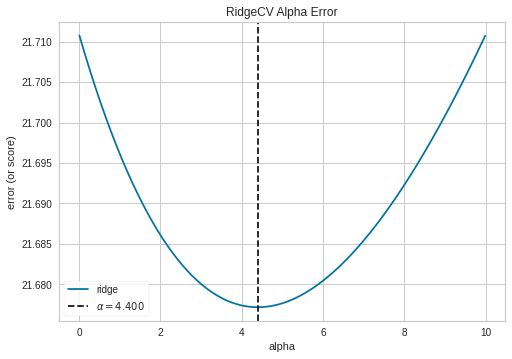

R-squared: 0.7003


In [ ]:
alphas=np.arange(0.01, 10, 0.01)
ridgeCV_reg = RidgeCV(alphas=alphas)
ridgeCV_reg.fit(X_train, y_train)
visualizer = AlphaSelection(ridgeCV_reg)

visualizer.fit(X_train, y_train)
g = visualizer.poof()

ridgeCV_pred = ridgeCV_reg.predict(X_test)
print("R-squared:", round(r2_score(y_test, ridgeCV_pred), 4))

Even if R-squared is virtually the same with the one we found through *GridSearchCV*, the lambda is slightly different because the setup of *RidgeCV* is different. The detail can be found at the *sklearn* website.

------

### Reference
* Overview and Math: [Penn State Stat Class](https://onlinecourses.science.psu.edu/stat857/node/158/)
* Linear vs. Ridge Image: [IPython Cookbook](https://ipython-books.github.io/81-getting-started-with-scikit-learn/)
* Linear Models: [sklearn Generalized Linear Models](http://scikit-learn.org/stable/modules/linear_model.html)
* RidgeCV and LassoCV: [sklearn RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)
* Grid Search Closs Validation: [sklearn GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
* Alpha Selection: [scikit yellowbrick](http://www.scikit-yb.org/en/latest/api/regressor/alphas.html)
* Other: [Derek Kane's Lecture Note](https://github.com/DerekKane/YouTube-Tutorials/blob/master/Presentation%20PDF/12.%20Ridge%20Regression%2C%20LASSO%2C%20and%20Elastic%20Nets.pdf)